In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
bank= pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
column = ['age','balance','duration','campaign','y']
bank_sel=bank[column]
bank_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

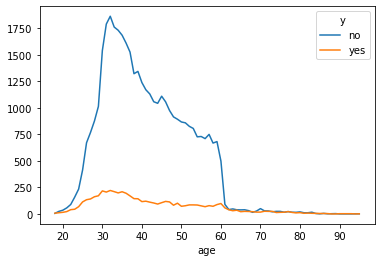

In [5]:
pd.crosstab(bank_sel.age,bank_sel.y).plot(kind='line')

#### Graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody

<AxesSubplot:>

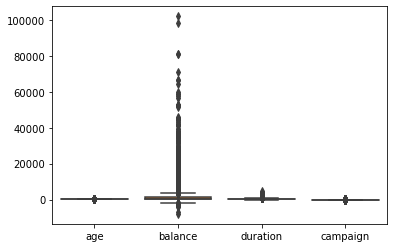

In [6]:
sns.boxplot(data = bank_sel)

In [7]:
bank_sel

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


In [8]:
bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})


C:\Users\Rahul\AppData\Local\Temp/ipykernel_13528/3794887572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})


In [9]:
bank_sel

,age,balance,duration,campaign,y,outcome
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0
...,...,...,...,...,...,...
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outcome', ylabel='count'>

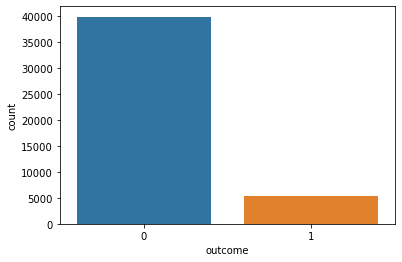

In [10]:
sns.countplot(bank_sel.outcome)

<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

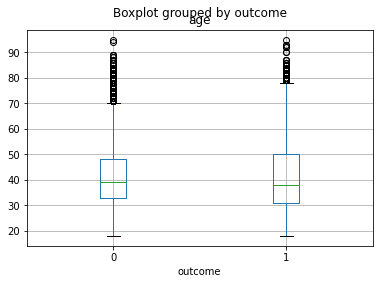

In [11]:
bank_sel.boxplot(column = 'age',by='outcome')

In [12]:
x=bank_sel.iloc[:,0:3]
y=bank_sel.iloc[:,5]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [15]:
lr=LogisticRegression()


In [16]:
model = lr.fit(x_train,y_train)

#### Training Accuracy

In [17]:
y_pred=model.predict(x_train)

In [18]:
from sklearn.metrics import accuracy_score

print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred),3)}')

Training-set accuracy score: 0.887


#### Testing Accuracy

In [19]:
y_pred2=model.predict(x_test)

In [20]:
print(f'Testing-set accuracy score: {round(accuracy_score(y_test, y_pred2),3)}')

Testing-set accuracy score: 0.886


#### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix = confusion_matrix(y_test,y_pred2)

In [23]:
confusion_matrix
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
confusion_matrix

array([[7856,  124],
       [ 907,  156]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

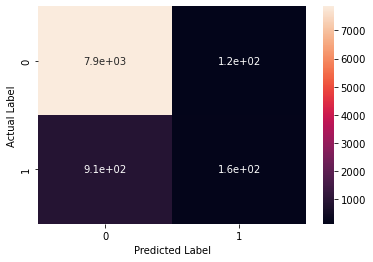

In [24]:
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [25]:
#classification Accuracy
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
classification_accuracy


0.885989162888422

In [26]:
#classification_error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
classification_error

0.11401083711157801

In [27]:
# print precision score
precision = TP / float(TP + FP)
precision

0.9844611528822055

In [28]:
#Recall
recall = TP / float(TP + FN)
recall

0.8964966335729773

In [29]:
#false_positive_rate
false_positive_rate = FP / float(FP + TN)
false_positive_rate

0.44285714285714284

In [30]:
#specificity
specificity = TN / (TN + FP)
specificity

0.5571428571428572

In [31]:
# print the first 10 predicted probabilities
y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.91641591, 0.08358409],
       [0.38852193, 0.61147807],
       [0.94051888, 0.05948112],
       [0.97929987, 0.02070013],
       [0.81409712, 0.18590288],
       [0.93816442, 0.06183558],
       [0.82406356, 0.17593644],
       [0.86300711, 0.13699289],
       [0.95655961, 0.04344039],
       [0.98540416, 0.01459584]])

In [32]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['the client has not subscribed a term deposit(0)', 'the client has subscribed a term deposit(1)'])
y_pred_prob_df

,the client has not subscribed a term deposit(0),the client has subscribed a term deposit(1)
0,0.916416,0.083584
1,0.388522,0.611478
2,0.940519,0.059481
3,0.979300,0.020700
4,0.814097,0.185903
5,0.938164,0.061836
6,0.824064,0.175936
7,0.863007,0.136993
8,0.956560,0.043440
9,0.985404,0.014596


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.56      0.15      0.23      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [34]:
# print the first 10 predicted probabilities
lr.predict_proba(x_test)[0:10, 1]

array([0.08358409, 0.61147807, 0.05948112, 0.02070013, 0.18590288,
       0.06183558, 0.17593644, 0.13699289, 0.04344039, 0.01459584])

In [35]:
# store the predicted probabilities
y_pred_A = lr.predict_proba(x_test)
y_pred_A[:, 1]

array([0.08358409, 0.61147807, 0.05948112, ..., 0.12901974, 0.12156212,
       0.03994065])

#### Overfitting And Underfitting


In [36]:
print(f'Training set score: {round(lr.score(x_train, y_train),4)}')

print(f'Test set score: {round(lr.score(x_test, y_test),4)}')

Training set score: 0.8874
Test set score: 0.886


### ROC 

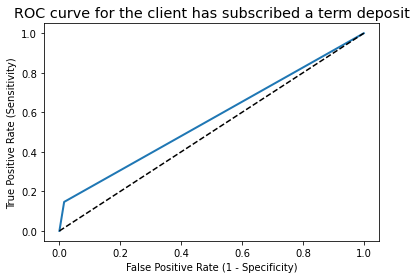

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred2)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for the client has subscribed a term deposit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### AUC

In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred2)
auc

0.565607810683812